In [1]:
#get_ipython().magic('matplotlib notebook')
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
%matplotlib notebook
#%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
import scipy.misc # For saving images as needed
import cv2 # OpenCV for perspective transform
import glob  # For reading in a list of images from a folder

import pprint 
#from IPython.core.debugger import set_trace
#%reset # clears the user namespace 

from roversupport import *
from utilsplotting import *
from imageprocutils import *
import ctelemetryreader

# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload
# This autoreload doesn't work unless cell explictly calls %autoreload. But even that is an improvement
%load_ext autoreload
#%autoreload # Reload all modules now
%autoreload 1 # Reload all modules imported with %aimport every time before executing the Python code typed.
#%autoreload 2 # Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%aimport roversupport
%aimport utilsplotting
%aimport imageprocutils
%aimport ctelemetryreader

# Do not reload these everytime
#%aimport -matplotlib.image
#%aimport -matplotlib.pyplot
#%aimport -numpy
#%aimport -math
#%aimport -scipy.misc
#%aimport -cv2
#%aimport -glob
#%aimport -pprint

# List modules which are to be automatically imported or not to be imported.
%aimport 

Modules to reload:
ctelemetryreader imageprocutils roversupport utilsplotting

Modules to skip:



In [2]:
%%HTML
<style> code {background-color : orange !important;} </style>
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Calibration Data & Perspective Transform
Read in and display example grid and rock sample calibration images.  You'll use the grid for perspective transform and the rock image for creating a new color selection that identifies these samples of interest. Define the perspective transform function from the lesson and test it on an image.

In [3]:
sourceGridImageFileName = '..\calibration_images\sample.jpg'
example_grid = '../calibration_images/example_grid1.jpg'
example_rock = '../calibration_images/example_rock1.jpg'

imgRaw = mpimg.imread(sourceGridImageFileName)
grid_img = mpimg.imread(example_grid)
rock_img = mpimg.imread(example_rock)

# Define pixels RGB thresholds for navigable, obstacle and nugget pixels
threshRGB_Nav =      [1, (160, 160, 160)]
threshRGB_Obstacle = [0, (130, 130, 130)]
threshHSV_Nug =      [1, (20, 150, 100), (50, 255, 255)]

matViewToMap = GetViewToMapTransform()
warped = perspect_transform(imgRaw, matViewToMap)
warpedGridImg = perspect_transform(grid_img, matViewToMap)

threshed = Thresh_ClipRGB(warped, threshRGB_Nav)
obstacles = Thresh_ClipRGB(warped, threshRGB_Obstacle)
rock = Thresh_ClipHSV(rock_img, threshHSV_Nug)

<IPython.core.display.Javascript object>


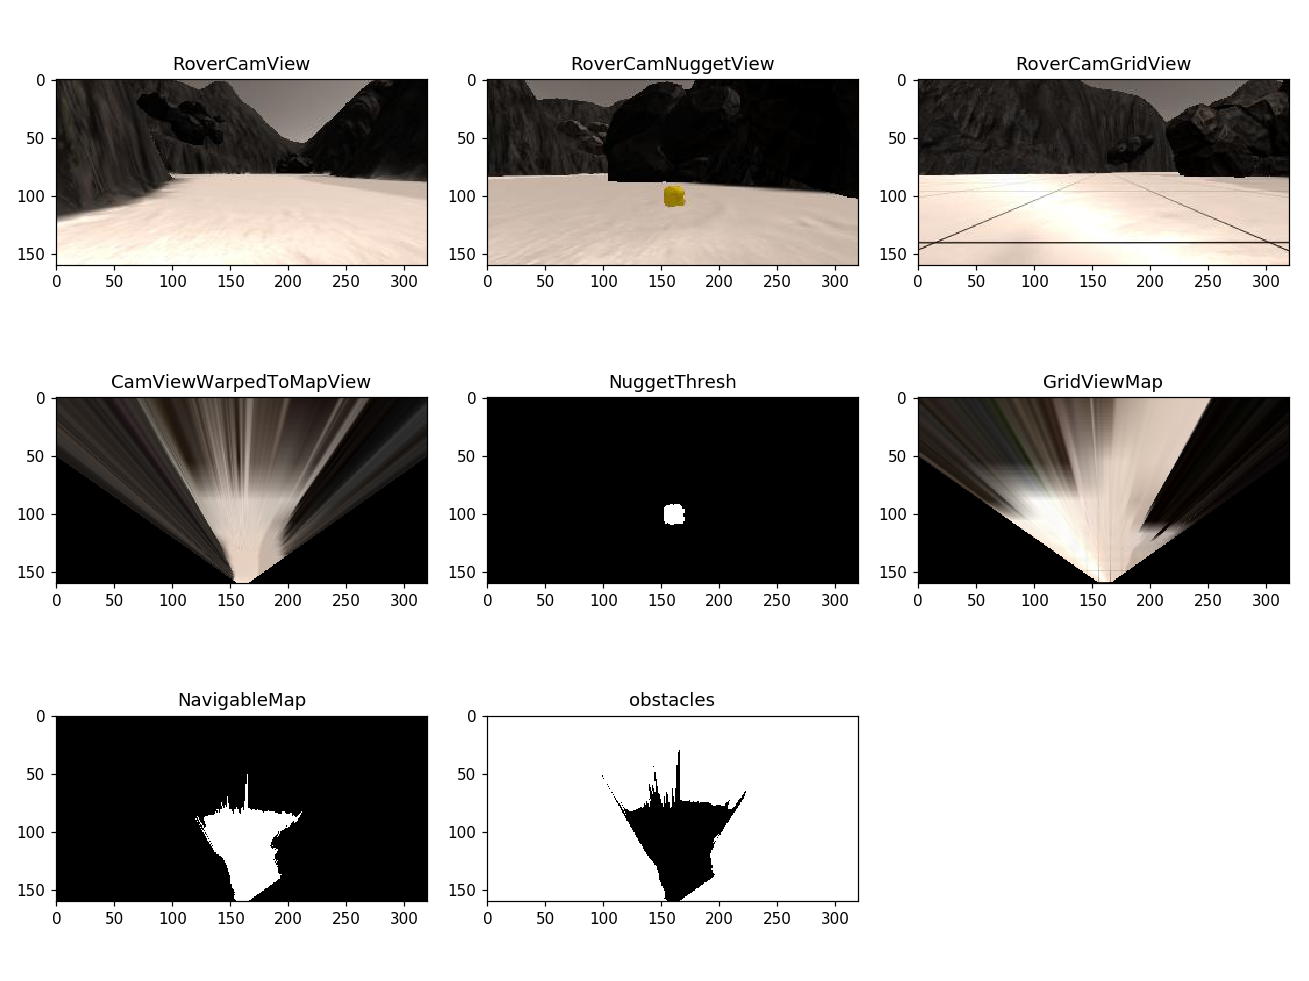

In [4]:
plt.close()
fig = plt.figure(figsize=(12,9))
#gs = gridspec.GridSpec(3, 3)

# =====Col 1
ax = plt.subplot(3, 3, 1) 
plt.imshow(imgRaw, aspect='auto') 
plt.title('RoverCamView')
ax.set_aspect(1)

ax = plt.subplot(334) 
plt.imshow(warped, aspect='auto') 
plt.title('CamViewWarpedToMapView')
ax.set_aspect(1)

ax = plt.subplot(337) 
plt.imshow(threshed, cmap='gray', aspect='auto')
plt.title('NavigableMap')
ax.set_aspect(1)

# =====Col 2
ax = plt.subplot(332) 
plt.imshow(rock_img, aspect='auto') 
plt.title('RoverCamNuggetView')
ax.set_aspect(1)

ax = plt.subplot(335) 
plt.imshow(rock, cmap='gray', aspect='auto') 
plt.title('NuggetThresh')
ax.set_aspect(1)

ax = plt.subplot(338) 
plt.imshow(obstacles, cmap='gray', aspect='auto') 
plt.title('obstacles')
ax.set_aspect(1)

# =====Col 3
ax = plt.subplot(333) 
plt.imshow(grid_img, aspect='auto') 
plt.title('RoverCamGridView')
ax.set_aspect(1)

ax = plt.subplot(336) 
plt.imshow(warpedGridImg, aspect='auto') 
plt.title('GridViewMap')
ax.set_aspect(1)

#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.tight_layout()
plt.show()

In [ ]:
#def plotMeanArrows(navPixX, navPixY):
#    dist, angles = to_polar_coords(navPixX, navPixY)
#    mean_dir = np.mean(angles)
#    arrow_length = np.mean(dist)
#    x_arrow = arrow_length * np.cos(mean_dir)
#    y_arrow = arrow_length * np.sin(mean_dir)
#    plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=4, width=1)
#
#def plotNavArea(title, imgIn, navPixX, navPixY):
#    numImgRows = imgIn.shape[0]
#    numImgCols = imgIn.shape[1]
#    
#    plt.title(title)
#    plt.ylim(-numImgCols/2, numImgCols/2) # PlotY <- Img X
#    plt.xlim(0, numImgRows) # PlotYX <- Img Y
#    plt.plot(navPixX, navPixY, '.', markersize=3)
#
#def plotNavField(fieldName, plotSelection, imgSrc, mask0):
#    imgNav = np.copy(imgSrc) # Copy the full nav field binary image
#    imgNav[mask0] = 0 # Zero out the pixels using the mask
#    navPixX, navPixY = rover_coords(imgNav) # Get 1 pixels set for plotting
#
#    ax = plt.subplot(plotSelection)
#    plotNavArea(fieldName, imgNav, navPixX, navPixY)
#    plotMeanArrows(navPixX, navPixY)
#    ax.set_aspect(1)


*Navigable Fields
These experiments were for trying to create wall hugging navigation. Unfortunately it hugged to close and was more likely to hang up in burried rocks. Still a work in progress. The idea was to mask out the left helf of navigable map so that the average would tend much more to the right side.

<IPython.core.display.Javascript object>


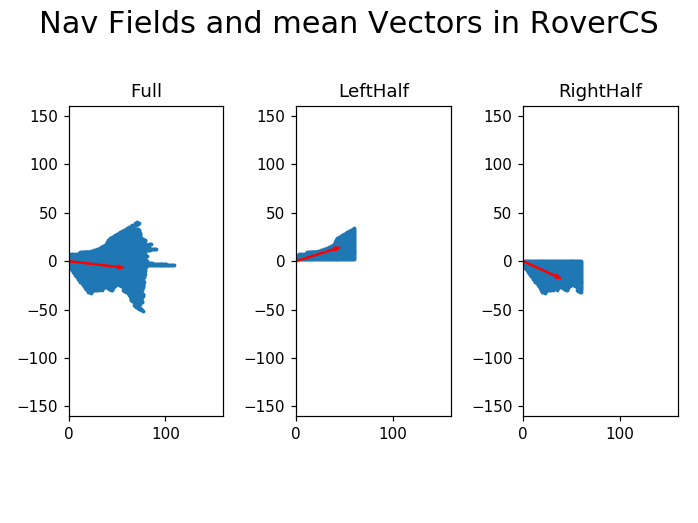

In [5]:
%autoreload
plt.close()
imgNav = threshed

fieldName = 'Full'
plotNavField(fieldName, 131, imgNav, g_mask0s[fieldName])

fieldName = 'LeftHalf'
plotNavField(fieldName, 132, imgNav, g_mask0s[fieldName])

fieldName = 'RightHalf'
plotNavField(fieldName, 133, imgNav, g_mask0s[fieldName])

plt.gcf().suptitle('Nav Fields and mean Vectors in RoverCS', fontsize=20)
plt.tight_layout()
plt.show()

## Read in saved data and ground truth map of the world
The next cell is all setup to read your saved data into a `pandas` dataframe.  Here you'll also read in a "ground truth" map of the world, where white pixels (pixel value = 1) represent navigable terrain.  

After that, we'll define a class to store telemetry data and pathnames to images.  When you instantiate this class (`data = Databucket()`) you'll have a global variable called `data` that you can refer to for telemetry and map data within the `process_image()` function in the following cell.  


In [6]:
%autoreload

g_telemetryInFileName='../cl_data/recording0/robot_log.csv'
g_truthMapInFileName = '../calibration_images/map_bw.png'
# Instantiate a CTelemetryReader. this will be a global variable/object
# that you can refer to in the process_image() function below
telReader = ctelemetryreader.CTelemetryReader()
telReader.SetInFileNames(g_telemetryInFileName, g_truthMapInFileName)
telReader.ReadInFiles()


## Write a function to process stored images

Modify the `process_image()` function below by adding in the perception step processes (functions defined above) to perform image analysis and mapping.  The following cell is all set up to use this `process_image()` function in conjunction with the `moviepy` video processing package to create a video from the images you saved taking data in the simulator.  

In short, you will be passing individual images into `process_image()` and building up an image called `output_image` that will be stored as one frame of video.  You can make a mosaic of the various steps of your analysis process and add text as you like (example provided below).  



To start with, you can simply run the next three cells to see what happens, but then go ahead and modify them such that the output video demonstrates your mapping process.  Feel free to get creative!

<IPython.core.display.Javascript object>


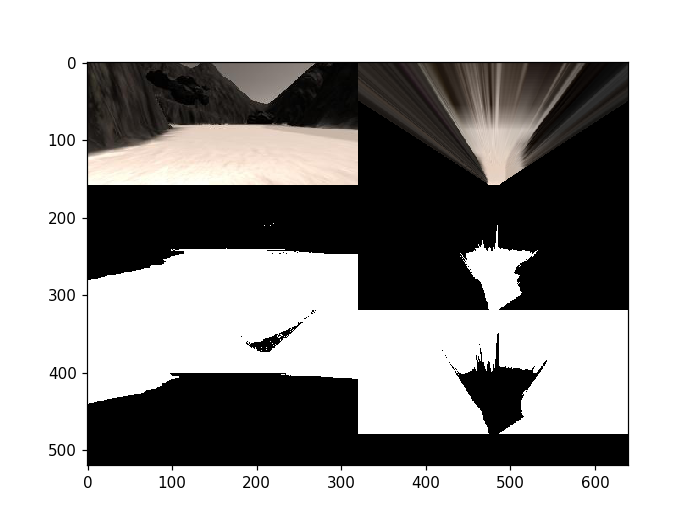

In [9]:
%autoreload

plt.close()
g_procImage = process_image(imgRaw, telReader)
g_compositeImg = CreateCompositeImage(g_procImage, telReader)
plt.imshow(g_compositeImg, cmap='gray', aspect='auto') 

## Make a video from processed image data
Use the [moviepy](https://zulko.github.io/moviepy/) library to process images and create a video.
  

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip

# Define pathname to save the output video
output = '../cl_data/recording0/output.mp4'
telReader.Reset()# = Databucket() # Re-initialize data in case you're running this cell multiple times
clip = ImageSequenceClip(telReader.images, fps=60) # Note: output video will be sped up because 
                                          # recording rate in simulator is fps=25
new_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time new_clip.write_videofile(output, audio=False)

This cell is to make a movie given just a bunch of Jpg files instead of the meta data csv file, as gets saved by the drive_rover.py run

In [ ]:
import os
import glob
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip

output2 = '../cl_data/m0/output.mp4'
inputFileSpec='../cl_data/m0/*.jpg'
inputFiles = glob.glob(inputFileSpec)  # Get all the pngs in the current directory
clip = ImageSequenceClip(inputFiles, fps=60) # Note: output video will be sped up because 
clip.write_videofile(output2, audio=False)


### This next cell should function as an inline video player
If this fails to render the video, try running the following cell (alternative video rendering method).  You can also simply have a look at the saved mp4 in your `/output` folder

In [ ]:
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

### Below is an alternative way to create a video in case the above cell did not work.

In [ ]:
import io
import base64
video = io.open(output, 'r+b').read()
encoded_video = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded_video.decode('ascii')))